In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import os
from matplotlib import ticker
plt.rcParams['ytick.right']  =plt.rcParams['xtick.top'] =True
xminorLocator=MultipleLocator(2)

def cm2inch(value):
    return value/2.54
plt.rcParams['figure.figsize'] = (cm2inch(8), cm2inch(6.5))
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['legend.fontsize'] = 6

from matplotlib import rcParams
config = {
    "text.usetex": False,
    "font.family":'serif',
    # "font.family":'stix',
    "font.size": 8,
    "mathtext.fontset":'stix',
    # "font.serif": ['SimSun'],
}
rcParams.update(config)

from mpl_toolkits.mplot3d import Axes3D
import numpy 
def setlabel(ax, label, loc=2, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(numpy.NaN,numpy.NaN,color='none',label=label,fillstyle='full')
    # legend_font = {
    # 'family': 'Times New Roman',
    # 'style':'normal',
    # 'size':10,
    # 'weight': "bold",
    # }
    label_legend = ax.legend(handles=[line],
                             loc=[-0.2,1.0005],
                             handlelength=0.0,
                             handleheight=0.0,
                             handletextpad=0.0,
                             borderaxespad=0.0,
                             borderpad=borderpad,
                             frameon=False,
                             shadow=True,
                             facecolor='gray',
                             prop={'weight':'bold','size':8},
                             **kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()
def setlabelm(ax, label, loc, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(numpy.NaN,numpy.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],
                             loc=loc,
                             handlelength=0,
                             handleheight=0,
                             handletextpad=0,
                             borderaxespad=0,
                             borderpad=borderpad,
                             frameon=False,
                             shadow=True,
                             facecolor='gray',
                             prop={'weight':'bold','size':8},
                             **kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()
def sciforyax(ax):
    formatter=ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0,0))
    ax.yaxis.set_major_formatter(formatter)
def sciforxax(ax):
    formatter=ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((0,0))
    ax.xaxis.set_major_formatter(formatter)
cbformat=ticker.ScalarFormatter(useMathText=True,useOffset=True)
cbformat.set_powerlimits((-1,1))

import matplotlib.ticker
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%.3f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
             self.format = r'$\mathdefault{%s}$' % self.format

levels=100
figureDPI=1200
figureType="jpeg"
timeUnit="fs"

In [11]:
dir='D:\\doc\\data\\ori\\pulse\\sqp\\'
dir='D:\\dataofpro\\'

In [12]:
print('Working directory',dir)
print("\n")
f=open(dir+"alog.dat",encoding="utf-8")
print(f.read(1500))
levels=100
figureDPI=1200
figureType="jpeg"
timeUnit="fs"
f=open(dir+"alog.dat",encoding="utf-8")
print(f.read())
import os
# os.startfile(dir)

Working directory D:\dataofpro\


 Obtain calculated controllable parameters from relevant documents:input
 The calculation starts at  -2500.0000000000000      femtoseconds and ends at   7500.0499999999993      femtoseconds
 The upper limit of the number of quantum rotations
 at the initial moment is            1
 |----- Quantization parameter -----|
 nr=         128  nj=         120  trux=          15  nn=        1800
 dt=   5.0000000000000003E-002 fs
 ntmax=      200001  xmin=   1.7500000000000000       xmax=   10.000000000000000       dx=   6.4453125000000000E-002
 |-----  Molecular parameters  -----|
 LiH: Reduced mass=   1604.3813700000001      a.u.Rotation coefficient=   7.5100002288818359      cm^-1
 |----- Laser pulse parameters -----|
 Points requirements for Gauss envelopes,Whether it is equal to zero   2.4706498014482988E-002   0.0000000000000000     
 energy v=0 -0.19847145603668204     
 The temperature of the system is    0.0000000000000000      K
The 1-th initial rotatio

In [13]:
TimeBegin = -2500
TimeEnd =7500
TimeTurn =7500
print('Begin time= ' + str(TimeBegin)+ ' fs')
print('End time= ' + str(TimeEnd)+ ' fs')

for i in range(0, 3):
    yn=input("Whether to adjust the range of time:(yes:1/no:0): ")
    if(str.isnumeric(yn)):
        yn=int(yn)
        if(yn==1):
            begtim=input("Input the begin time: ")
            endtime=input("Input the end time: ")
            TimeBegin=int(begtim)
            TimeEnd=int(endtime)
            break
        elif(yn==0):
            print('The range of time would change.')
            break
    else:
        print('Input 1 or 0 to choose. '+str(i+1)+'/3')
        
print('Begin time= ' + str(TimeBegin)+ ' fs','End time= ' + str(TimeEnd)+ ' fs')

Begin time= -2500 fs
End time= 7500 fs
The range of time would change.
Begin time= -2500 fs End time= 7500 fs


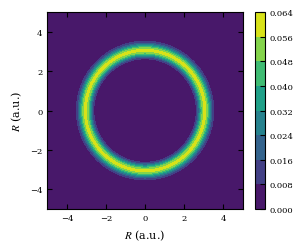

In [14]:
data =np.loadtxt(dir+"wave0.dat")
#data=scipy.ndimage.zoom(data,1)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
plt.xlim(-5, 5)
plt.ylim(-5, 5)
# plt.title('(a)',loc='left')
ax=plt.tricontourf(x,y,z)
#interpolation='spline16'
plt.colorbar()
plt.xlabel("$R$ (a.u.)")
plt.ylabel("$R$ (a.u.)")
plt.show()
plt.close()

###plot potential energy

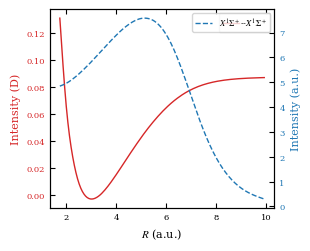

In [15]:
data=np.loadtxt(dir+"pot.dat")
x=data[:,0]
y1=data[:,1]
y2=data[:,2]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('$R$ (a.u.)')
ax1.set_ylabel("Intensity (D)", color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.legend(['$X^1\Sigma^+$'],loc=0)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel("Intensity (a.u.)", color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.legend(['$X^1\Sigma^+$--$X^1 \Sigma ^+$'],loc=0)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig(dir+"PotAndDip.jpeg",bbox_inches = 'tight',dpi=600)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

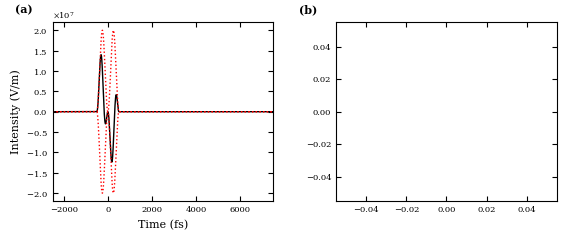

In [22]:
plt.figure(figsize=(16/2.54,13/2.54))
ax1=plt.axes([0.10,0.55,0.35,0.35])
setlabel(ax1,"(a)")
data=np.loadtxt(dir+"laser.dat")
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]
y4=data[:,4]
plt.plot(x,y1,'k-')
plt.plot(x,y4,'r:',x,-y4,'r:')#,linewidth=0.5)
plt.xlim(TimeBegin,TimeEnd)
plt.xlabel('Time (fs)')
plt.ylabel("Intensity (V/m)")
sciforyax(ax1)

ax2=plt.axes([0.55,0.55,0.35,0.35])
setlabel(ax2,"(b)")
data=np.loadtxt(dir+"cos1.dat")
x=data[:,0]
y1=data[:,1]
y2=data[:,2]

# fig, ax1 = plt.subplots()
ax1=ax2
color = 'tab:red'
ax1.set_xlabel('Time (fs)')
ax1.set_ylabel('$\\langle{\\rm  cos} \\theta \\rangle$', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xlim(TimeBegin, TimeEnd)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$\\langle{\\rm cos^2} \\theta \\rangle$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout() 

ax3=plt.axes([0.1,0.1,0.35,0.35])
setlabel(ax3,"(c)")
data=np.loadtxt(dir+"p_veq0.dat")
plt.xlim(TimeBegin,TimeEnd)
ax=plt.plot(data[:,0],data[:,1],'k-',data[:,0],data[:,2],'r-',data[:,0],data[:,3],'b-',data[:,0],data[:,4],'k--',data[:,0],data[:,5],'r--',data[:,0],data[:,6],'b--')
plt.ylim(-0.1,1.1)
plt.xlabel("Time (fs)")
plt.ylabel("Population")
plt.legend(['$| 0,0 \\rangle$','$| 0,1 \\rangle$','$| 0,2 \\rangle$','$| 0,3 \\rangle$','$| 0,4 \\rangle$','$| 0,5 \\rangle$'])

ax4=plt.axes([0.55,0.10,0.44,0.35])
setlabel(ax4,"(d)")
# setlabel(ax,"(a)")
data =np.loadtxt(dir+"tap.dat")
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
plt.xlim(TimeBegin, TimeEnd )
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar(format=cbformat)
plt.xlabel("Time (fs)")
plt.ylabel("$\\theta$ (Degrees)")
plt.savefig(dir+"Total."+figureType,dpi=figureDPI)


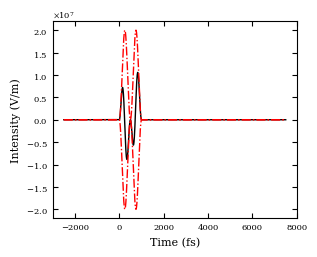

In [ ]:
data=np.loadtxt(dir+"laser.dat")
x=data[:,0]
y1=data[:,1]
y2=data[:,2]
y3=data[:,3]
y4=data[:,4]
ax=plt.gca()
#plt.grid(False)
plt.xlabel('Time (fs)')
plt.ylabel("Intensity (V/m)")
# plt.xlim(TimeBegin, TimeEnd)
# plt.xlim(-10,2100)
sciforyax(ax)
plt.plot(x,y1,'k-',x,y4,'r-.',x,-y4,'r-.')#,x,y2,'b--',x,y4,'r-.')#,x,y2,'r-')
#plt.legend(["First", "Second"],loc=(0.75,0.7))
plt.savefig(dir+"LaserFiled.jpeg",bbox_inches = 'tight',transparent=True,dpi=600)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6344\2762144275.py:20: UserWarning: loadtxt: Empty input file: "D:\dataofpro\waveend.dat"
  data =np.loadtxt(dir+"waveend.dat")


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

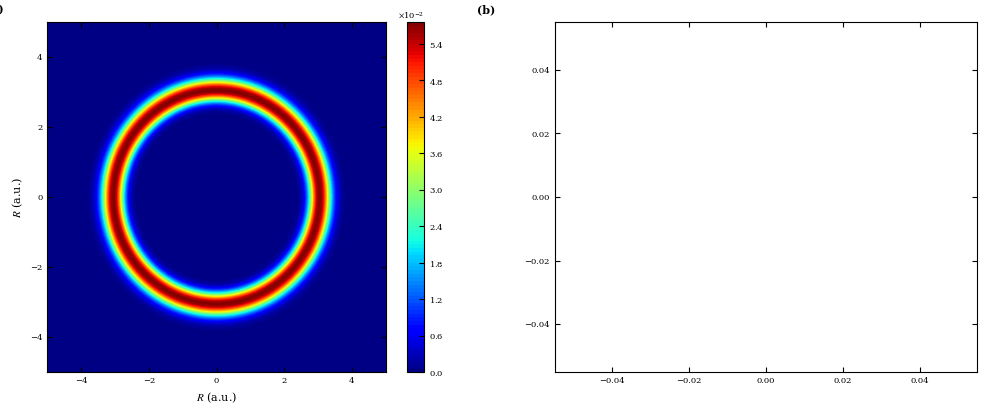

In [ ]:

import scipy.ndimage
plt.figure(figsize=(12,10))
ax=plt.subplot(2,2,1)
data =np.loadtxt(dir+"wave0.dat")
#data=scipy.ndimage.zoom(data,1)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
plt.xlim(-5, 5)
plt.ylim(-5, 5)
setlabel(ax,"(a)")
plt.tricontourf(x,y,z,levels,cmap='jet')
#interpolation='spline16'
plt.colorbar(format=cbformat)
plt.xlabel("$\tR$ (a.u.)")
plt.ylabel("$\tR$ (a.u.)")
ax=plt.subplot(2,2,2)
setlabel(ax,"(b)")
data =np.loadtxt(dir+"waveend.dat")
#data=scipy.ndimage.zoom(data,1)
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.tricontourf(x,y,z,levels,cmap='jet')
#interpolation='spline16'
plt.colorbar(format=cbformat)
plt.xlabel("$R$ (a.u.)")
plt.ylabel("$R$ (a.u.)")


plt.savefig(dir+"InitialWavePacket.jpeg",bbox_inches = 'tight',transparent=True,dpi=600)
plt.show()

In [ ]:
#cos
plt.figure(figsize=(8,6))
data=np.loadtxt(dir+"cos1.dat")
x=data[:,0]
y1=data[:,1]
y2=data[:,2]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (fs)')
ax1.set_ylabel('$\\langle{\\rm  cos} \\theta \\rangle$', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xlim(TimeBegin, TimeEnd)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('$\\langle{\\rm cos^2} \\theta \\rangle$', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(dir+"AlignmentAndOrientation.jpeg",bbox_inches = 'tight',dpi=600)
plt.show()
# os.startfile(dir+"AlignmentAndOrientation.jpeg")

In [ ]:
#Time Angular Distribution
plt.figure(figsize=(8*2/2.54,6.5/2.54))
ax=plt.subplot(1,2,1)
# setlabel(ax,"(a)")
data =np.loadtxt(dir+"tap.dat")
#plt.style.use('_mpl-gallery-nogrid')
x=data[:,0]
y=data[:,1]
z=data[:,2]
levels=np.linspace(z.min(), z.max(), 50)

# plt.xlim(TimeBegin, TimeEnd )
plt.tricontourf(x,y,z,levels,cmap='jet')
plt.colorbar(format=cbformat)
plt.xlabel("Time (fs)")
plt.ylabel("$\\theta$ (Degrees)")
# plt.subplot(1,2,2)
# data =np.loadtxt(dir+"trp.dat")
# #plt.style.use('_mpl-gallery-nogrid')
# x=data[:,0]
# y=data[:,1]
# z=data[:,2]
# setlabel(ax,"(b)")
# plt.xlim(TimeBegin+5, TimeEnd-5 )
# plt.tricontourf(x,y,z,levels,cmap='jet')
# plt.colorbar(format=cbformat)
# plt.xlabel("Time (fs)")
# plt.ylabel("$\tR$ (a.u.)")
# plt.ylim(1.75,4.5)
plt.savefig(dir+"WaveDis."+figureType,bbox_inches = 'tight',dpi=600)
plt.show()

In [ ]:
data=np.loadtxt(dir+"popu1.dat")
plt.xlim(TimeBegin,TimeEnd)
ax=plt.plot(data[:,0],data[:,1],'k-')
plt.ylim(-0.1,1.1)
plt.xlabel("Time (fs)")
plt.ylabel("Population")
plt.savefig(dir+"popu.jpeg",dpi=600,bbox_inches="tight")

In [ ]:
data=np.loadtxt(dir+"p_veq0.dat")
plt.xlim(TimeBegin,TimeEnd)
ax=plt.plot(data[:,0],data[:,1],'k-',data[:,0],data[:,2],'r-',data[:,0],data[:,3],'b-',data[:,0],data[:,4],'k--',data[:,0],data[:,5],'r--',data[:,0],data[:,6],'b--')
plt.ylim(-0.1,1.1)
plt.xlabel("Time (fs)")
plt.ylabel("Population")
plt.legend(['$| 0,0 \\rangle$','$| 0,1 \\rangle$','$| 0,2 \\rangle$','$| 0,3 \\rangle$','$| 0,4 \\rangle$','$| 0,5 \\rangle$'])
plt.savefig(dir+"popuveq0."+figureType,dpi=600,bbox_inches="tight")

In [ ]:
data=np.loadtxt(dir+"p_veq1.dat")
plt.xlim(TimeBegin,TimeEnd)
ax=plt.plot(data[:,0],data[:,1],'k-',data[:,0],data[:,2],'r-',data[:,0],data[:,3],'b-',data[:,0],data[:,4],'k--',data[:,0],data[:,5],'r--',data[:,0],data[:,6],'b--')
plt.ylim(-0.1,1.1)
plt.xlabel("Time (fs)")
plt.ylabel("Population")
plt.legend(['$| 1,0 \\rangle$','$| 1,1 \\rangle$','$| 1,2 \\rangle$','$| 1,3 \\rangle$','$|1,4 \\rangle$','$| 1,5 \\rangle$'])
plt.savefig(dir+"popuveq1.jpeg",dpi=600,bbox_inches="tight")

In [ ]:
plt.figure(figsize=((16/2.54),(13/2.54)))
from matplotlib.ticker import MaxNLocator
#timeP="20"
fileList1 =os.listdir(dir+"p_vj\\")
filelist1=list()
s1=list()
print("Checking image list")
n=len(fileList1)
if n:
    for i in range(n):
        s=dir+"p_vj\\"+str(fileList1[i])
        if s[-4:]==".dat":
            s1.append(s)
    n=len(s1)
    for ii in range(n):
        ax1=plt.gca()
        DataPop =np.loadtxt(s1[ii])
        #plt.style.use('_mpl-gallery-nogrid')
        x=DataPop[:,0]
        y=DataPop[:,1]
        z=DataPop[:,2]
        ny=int((max(y)-min(y))/(y[2]-y[1]))+1
        nx=int((max(x)-min(x))/(x[ny]-x[0]))+1
        zMesh=np.zeros((ny,nx))
        for i in range(1,nx):
            for j in range(1,ny):
                zMesh[j-1,i-1]=z[(i-1)*ny+j-1]
        # print('nx= ',nx,' ny= ',ny)
        # print('xMax= ',max(x),' xMin= ',min(x),' yMax= ',max(y),' yMin= ',min(y))
        # print('x[50]',x[50])
        # print(x[0])
        # print(zMesh)
        xMesh=np.linspace(min(x),max(x),nx)
        yMesh=np.linspace(min(y),max(y),ny)
        #xx,yy,zz=np.meshgrid(xMesh,yMesh,zMesh)
        plt.pcolormesh(xMesh,yMesh,zMesh,cmap='jet',vmin=0.0,vmax=1.0)
        ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
        plt.xlim(-0.5,19.5)
        plt.ylim(-0.5,19.5)
        plt.xlabel('$V$')
        plt.ylabel('$J$')
        plt.title("Ground state, $t$ = "+fileList1[ii][11:17]+" fs",loc='left')
        plt.colorbar(format=cbformat)
        plt.savefig(dir+"p_vj\\"+fileList1[ii][:17]+"."+figureType,bbox_inches = 'tight',dpi=figureDPI)
        plt.close()

In [ ]:

fileList =os.listdir(dir+"p_vj\\")
# print(fileList)
image_list=list()
# print("Checking image list")
n=len(fileList)
for i in range(n):
    s=dir+"p_vj\\"+str(fileList[i])
    if s[-5:]==".jpeg":
        image_list.append(s)
n=len(image_list)
import  imageio
import os
def compose_gif(image_list,gif_name,myduration):
    frames=[]
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    imageio.mimsave(gif_name,frames,'GIF',duration=myduration)
    return
if n:   
    gif_name = "P_VJ.gif"# print(image_list)
    myduration=0.3#eval(input("duration: s"))
    compose_gif(image_list,dir+gif_name,myduration)
    print("Created")    